In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error



In [38]:
df = pd.read_csv("/content/wage_regularization.csv")
df.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,769000.0,12,144,1728,20736,248832,31,961,29791,923521,28629151
1,808000.0,18,324,5832,104976,1889568,37,1369,50653,1874161,69343957
2,825000.0,14,196,2744,38416,537824,33,1089,35937,1185921,39135393
3,650000.0,12,144,1728,20736,248832,32,1024,32768,1048576,33554432
4,562000.0,11,121,1331,14641,161051,34,1156,39304,1336336,45435424


In [39]:
#1

df = pd.read_csv("/content/wage_regularization.csv")

#scale all numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df_sc = df.copy()
df_sc[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the scaled dataframe
print(df_sc.head())


       wage      educ     educ2     educ3     educ4     educ5       age  \
0 -0.467520 -0.668851 -0.681389 -0.683465 -0.677116 -0.664268 -0.669710   
1 -0.371019  2.064038  2.223684  2.379630  2.530868  2.675999  1.261947   
2 -0.328955  0.242112  0.157854  0.074845 -0.003836 -0.075928 -0.025824   
3 -0.761969 -0.668851 -0.681389 -0.683465 -0.677116 -0.664268 -0.347767   
4 -0.979713 -1.124333 -1.052593 -0.979773 -0.909223 -0.842975  0.296119   

       age2      age3      age4      age5  
0 -0.691203 -0.708954 -0.723031 -0.733576  
1  1.281608  1.297931  1.310810  1.320211  
2 -0.072282 -0.117721 -0.161641 -0.203607  
3 -0.386577 -0.422573 -0.455483 -0.485129  
4  0.251685  0.206178  0.160164  0.114187  


In [40]:
#2

# Define your feature space and target variables
X = df_sc.drop('wage', axis=1)  # Features (all columns except 'wage')
y = df_sc['wage']  # Target variable ('wage')

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)


In [41]:
#3

# Add a constant term to the independent variables
X_train_with_constant = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train_with_constant)
results = model.fit()


# Print the summary output
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     10.81
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.83e-17
Time:                        00:28:56   Log-Likelihood:                -1016.0
No. Observations:                 748   AIC:                             2054.
Df Residuals:                     737   BIC:                             2105.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.035     -0.080      0.9

3.2. The $R^2$ is 0.138.

3.3. None of the variables have a P-value below 5%.

In [42]:
#4.1, 4.2
# Train all 4 models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
elastic_net_model = ElasticNet()

linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)


# Save the predicted values
y_hat_linear = linear_model.predict(X_test)
y_hat_ridge = ridge_model.predict(X_test)
y_hat_lasso = lasso_model.predict(X_test)
y_hat_net = elastic_net_model.predict(X_test)


In [43]:
#4.3, 4.4
# Construct df_predictions
df_predictions = pd.DataFrame({'y_test': y_test,
                               'y_hat_linear': y_hat_linear,
                               'y_hat_ridge': y_hat_ridge,
                               'y_hat_lasso': y_hat_lasso,
                               'y_hat_net': y_hat_net})

# Estimate coefficients and create coefficients dataframe
coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'linear': linear_model.coef_,
    'ridge': ridge_model.coef_,
    'lasso': lasso_model.coef_,
    'elastic_net': elastic_net_model.coef_
})

print(df_predictions.head())
print(coefficients)


       y_test  y_hat_linear  y_hat_ridge  y_hat_lasso  y_hat_net
434  0.042199     -0.267170    -0.202696    -0.012852  -0.012852
238  1.910343      0.699718     0.704007    -0.012852  -0.012852
531 -0.700110     -0.065042     0.045579    -0.012852  -0.012852
157  2.328510      0.689508     0.653410    -0.012852  -0.012852
601  1.341239      0.208652     0.171149    -0.012852  -0.012852
  feature       linear     ridge  lasso  elastic_net
0    educ  -109.991745  0.169172    0.0          0.0
1   educ2   462.562174  0.309854    0.0          0.0
2   educ3  -736.380870  0.232209    0.0          0.0
3   educ4   527.476085 -0.016857    0.0          0.0
4   educ5  -143.414487 -0.393124    0.0          0.0
5     age -1295.337038  0.005242    0.0          0.0
6    age2  5164.461988  0.136966    0.0          0.0
7    age3 -7783.011658  0.147814    0.0          0.0
8    age4  5255.053775  0.043936    0.0          0.0
9    age5 -1341.061042 -0.166490    0.0          0.0


**4.5**
 The coefficients of Lasso and ElasticNet are zero because the regularization parameter is likely too high causing them to shrink to 0.


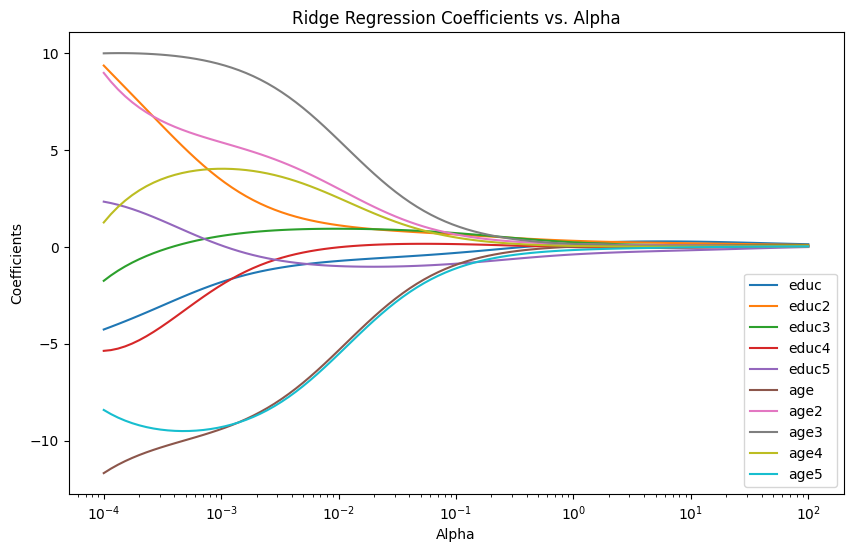

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.501e+02, tolerance: 7.598e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+02, tolerance: 7.598e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+02, tolerance: 7.598e

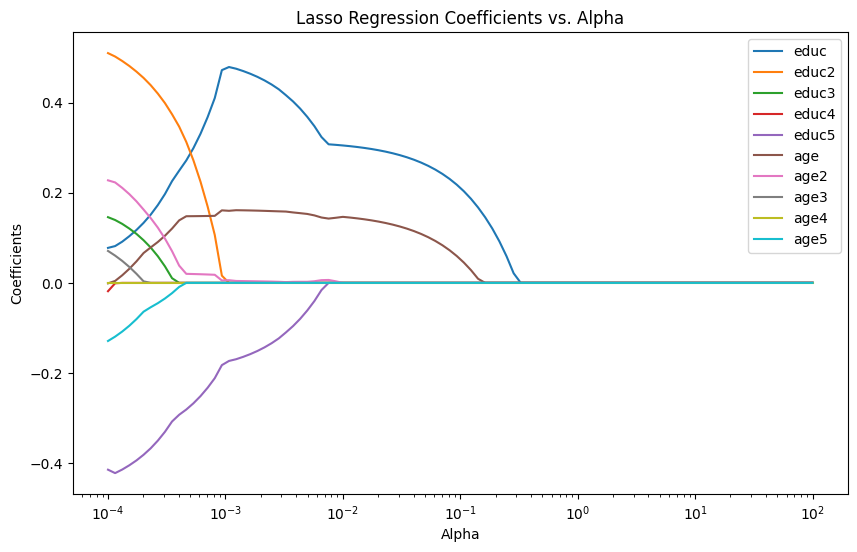

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.469e+02, tolerance: 7.598e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+02, tolerance: 7.598e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.123e+02, tolerance: 7.598e

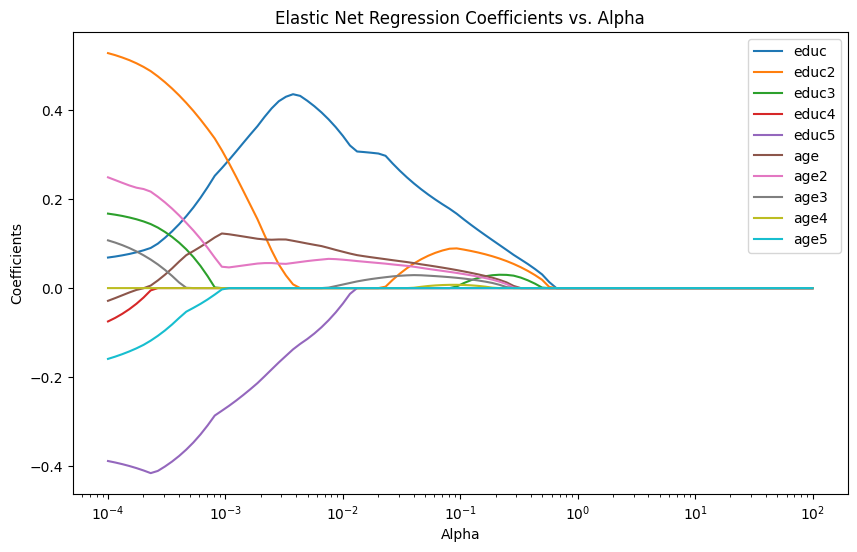

In [44]:
#5
import numpy as np
import matplotlib.pyplot as plt

alphas = 10**np.linspace(-4, 2, 100)

# Ridge Regression
ridge_coefficients = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_coefficients.append(ridge_model.coef_)

plt.figure(figsize=(10, 6))
for i in range(X_train.shape[1]):
    plt.plot(alphas, [coef[i] for coef in ridge_coefficients], label=X_train.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients vs. Alpha')
plt.legend(loc='best')
plt.show()


# Lasso Regression
lasso_coefficients = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_coefficients.append(lasso_model.coef_)

plt.figure(figsize=(10, 6))
for i in range(X_train.shape[1]):
    plt.plot(alphas, [coef[i] for coef in lasso_coefficients], label=X_train.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients vs. Alpha')
plt.legend(loc='best')
plt.show()


# Elastic Net Regression
elastic_net_coefficients = []
for alpha in alphas:
    elastic_net_model = ElasticNet(alpha=alpha)
    elastic_net_model.fit(X_train, y_train)
    elastic_net_coefficients.append(elastic_net_model.coef_)

plt.figure(figsize=(10, 6))
for i in range(X_train.shape[1]):
    plt.plot(alphas, [coef[i] for coef in elastic_net_coefficients], label=X_train.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Elastic Net Regression Coefficients vs. Alpha')
plt.legend(loc='best')
plt.show()



**Ridge**

As the alpha increases the coefficients decrease towards zero. This occurs aroudn an alpha of 10.


**LASSO**

The coefficients for lasso move towards zero, but the movement is a bit sporatic. Some coefficients also become zero

**Elastic Net**

The coefficients follow a pattern of both where some move gradually towards zero, where as others jump around. Coefficeints approxamate towards zero, and some become zero.

 **6.1, 6.2**

**Ridge**

age3 and educ2 drop the most when alpha moves from .0001 to 10.

**LASSO**

age and educ survive LASSO $10^-1$

In [45]:
#7

# Define parameter grids for each model
ridge_param_grid = {'alpha': np.logspace(-4, 2, 100)}
lasso_param_grid = {'alpha': np.logspace(-4, 2, 100)}
elastic_net_param_grid = {'alpha': np.logspace(-4, 2, 100), 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

# Create GridSearchCV objects for each model
ridge_cv = GridSearchCV(Ridge(), ridge_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv = GridSearchCV(Lasso(), lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
elastic_net_cv = GridSearchCV(ElasticNet(), elastic_net_param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the models using cross-validation
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)
elastic_net_cv.fit(X_train, y_train)

# Get the optimal alpha for each model
optimal_ridge_alpha = ridge_cv.best_params_['alpha']
optimal_lasso_alpha = lasso_cv.best_params_['alpha']
optimal_elastic_net_alpha = elastic_net_cv.best_params_['alpha']
optimal_elastic_net_l1_ratio = elastic_net_cv.best_params_['l1_ratio']

# Print the optimal alphas
print(f"Optimal Ridge alpha: {optimal_ridge_alpha}")
print(f"Optimal Lasso alpha: {optimal_lasso_alpha}")
print(f"Optimal Elastic Net alpha: {optimal_elastic_net_alpha}")
print(f"Optimal Elastic Net l1_ratio: {optimal_elastic_net_l1_ratio}")

# Save the optimal alphas in a new object (e.g., a dictionary)
optimal_alphas = {
    'ridge': optimal_ridge_alpha,
    'lasso': optimal_lasso_alpha,
    'elastic_net_alpha': optimal_elastic_net_alpha,
    'elastic_net_l1_ratio': optimal_elastic_net_l1_ratio
}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+02, tolerance: 6.205e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.115e+01, tolerance: 6.249e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e+02, tolerance: 6.452e

Optimal Ridge alpha: 0.001873817422860383
Optimal Lasso alpha: 0.01
Optimal Elastic Net alpha: 0.01519911082952933
Optimal Elastic Net l1_ratio: 0.7


In [46]:
#8

# Train all 4 models using optimal alpha
linear_model = LinearRegression()
ridge_model = Ridge(alpha=optimal_ridge_alpha)
lasso_model = Lasso(alpha=optimal_lasso_alpha)
elastic_net_model = ElasticNet(alpha=optimal_elastic_net_alpha, l1_ratio=optimal_elastic_net_l1_ratio)


linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)


# Save the predicted values
y_hat_linear = linear_model.predict(X_test)
y_hat_ridge = ridge_model.predict(X_test)
y_hat_lasso = lasso_model.predict(X_test)
y_hat_net = elastic_net_model.predict(X_test)

# Construct df_predictions_optimal
df_predictions_optimal = pd.DataFrame({'y_test': y_test,
                               'y_hat_linear': y_hat_linear,
                               'y_hat_ridge': y_hat_ridge,
                               'y_hat_lasso': y_hat_lasso,
                               'y_hat_net': y_hat_net})

# Estimate coefficients and create coefficients dataframe
coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'linear': linear_model.coef_,
    'ridge': ridge_model.coef_,
    'lasso': lasso_model.coef_,
    'elastic_net': elastic_net_model.coef_
})

print(df_predictions_optimal.head())
print(coefficients)


       y_test  y_hat_linear  y_hat_ridge  y_hat_lasso  y_hat_net
434  0.042199     -0.267170    -0.260984    -0.214151  -0.212360
238  1.910343      0.699718     0.693558     0.810961   0.807095
531 -0.700110     -0.065042    -0.055346     0.024603   0.028182
157  2.328510      0.689508     0.687815     0.763748   0.758168
601  1.341239      0.208652     0.228681     0.155429   0.157419
  feature       linear     ridge     lasso  elastic_net
0    educ  -109.991745 -1.354931  0.305015     0.303153
1   educ2   462.562174  2.406863  0.000000     0.000000
2   educ3  -736.380870  0.762291  0.000000     0.000000
3   educ4   527.476085 -1.097063 -0.000000     0.000000
4   educ5  -143.414487 -0.426930 -0.000000    -0.000000
5     age -1295.337038 -8.706934  0.146530     0.081832
6    age2  5164.461988  4.894176  0.000110     0.061518
7    age3 -7783.011658  8.798757  0.000000     0.002254
8    age4  5255.053775  3.909872  0.000000     0.000000
9    age5 -1341.061042 -8.773925  0.000000     0.0

In [48]:
#9

# Calculate RMSE for each model
rmse_linear = mean_squared_error(df_predictions_optimal['y_test'], df_predictions_optimal['y_hat_linear'], squared=False)
rmse_ridge = mean_squared_error(df_predictions_optimal['y_test'], df_predictions_optimal['y_hat_ridge'], squared=False)
rmse_lasso = mean_squared_error(df_predictions_optimal['y_test'], df_predictions_optimal['y_hat_lasso'], squared=False)
rmse_elastic_net = mean_squared_error(df_predictions_optimal['y_test'], df_predictions_optimal['y_hat_net'], squared=False)

# Create a dictionary to store RMSE values
rmse_dict = {
    'Linear Regression': rmse_linear,
    'Ridge Regression': rmse_ridge,
    'Lasso Regression': rmse_lasso,
    'Elastic Net Regression': rmse_elastic_net
}

# Print RMSE values
for model, rmse in rmse_dict.items():
    print(f"{model} RMSE: {rmse:.4f}")

# Rank models based on RMSE (lower is better)
sorted_rmse = sorted(rmse_dict.items(), key=lambda item: item[1])
print("\nModel Ranking (based on RMSE - lower is better):")
for i, (model, rmse) in enumerate(sorted_rmse):
    print(f"{i+1}. {model}: {rmse:.4f}")

# Check if any model beat the simple linear model
if rmse_ridge < rmse_linear or rmse_lasso < rmse_linear or rmse_elastic_net < rmse_linear:
    print("\nAt least one regularized model outperformed the simple linear model.")
else:
    print("\nNone of the regularized models outperformed the simple linear model.")



Linear Regression RMSE: 0.8650
Ridge Regression RMSE: 0.8643
Lasso Regression RMSE: 0.8681
Elastic Net Regression RMSE: 0.8684

Model Ranking (based on RMSE - lower is better):
1. Ridge Regression: 0.8643
2. Linear Regression: 0.8650
3. Lasso Regression: 0.8681
4. Elastic Net Regression: 0.8684

At least one regularized model outperformed the simple linear model.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

One of the penalized models was able to beta the simple linear regression model. As for the others they may be too complicated for this dataset, and a simplelinear regression might be. abetter option for this.